#Multi-Label Classification Problem

In [1]:
!git clone https://github.com/omer770/multi_label_classification.git

Cloning into 'multi_label_classification'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [4]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 5.2 MB/s 


In [6]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [7]:
df = pd.read_csv("/content/multi_label_classification/multi_label.csv")

In [8]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [9]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [10]:
df['mysql'] = df['mysql'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


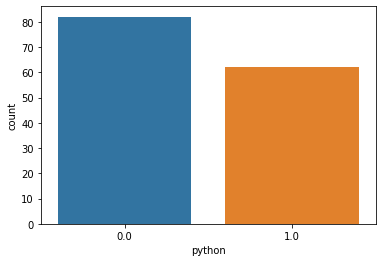

In [12]:
# Value Count 
sns.countplot(df['python'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


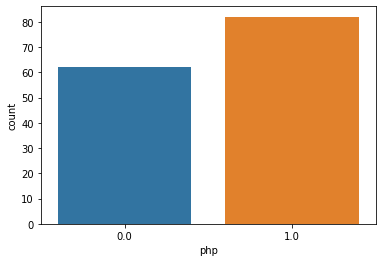

In [13]:
# Value Count 
sns.countplot(df['php'])

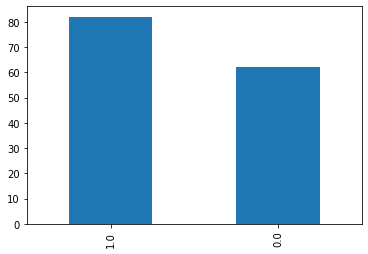

In [14]:
df['php'].value_counts().plot(kind='bar')

##Text Preprocessing

In [15]:
!pip install neattext
#remove_stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.7 MB/s 


In [16]:
import neattext as nt
import neattext.functions as nfx

In [17]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [18]:
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [ ]:
dir(nfx)

In [20]:
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [21]:
corpus = df['title'].apply(nfx.remove_stopwords)

##Feature Engineering



In [22]:
tfidf = TfidfVectorizer()

In [24]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [25]:
y = df[['mysql', 'python', 'php']]

In [26]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [27]:
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


## Building Our Model

In [28]:
import skmultilearn

In [29]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [ ]:
binary_rel_clf_file = open('/content/pkl/binary_rel_clf_model_file.pkl')
tfidf_vectorizer_file = open('/content/pkl/tfidf_vectorizer_SO_tags_file.pkl')

In [30]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [31]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [32]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [33]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [34]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.9090909090909091

In [35]:
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.06060606060606061

In [ ]:
#Classifier Chains

In [36]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [37]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [38]:
clf_chain_model

{'accuracy:': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

In [39]:
#LabelPowerset

In [40]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [50]:
clf_labelP_model

{'accuracy:': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

### Apply On A Simple Title

In [41]:
ex1 = df['title'].iloc[0]

In [42]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [43]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])

##Model Save

In [44]:
import joblib

In [45]:
# Save Model
binary_rel_clf_file = open("binary_rel_clf_model_file.pkl","wb")
joblib.dump(binary_rel_clf,binary_rel_clf_file)
binary_rel_clf_file.close()

In [46]:
# Save Vectorizer
tfidf_vectorizer_file = open("tfidf_vectorizer_SO_tags_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()

##File Download

In [47]:
from google.colab import files
files.download('/content/binary_rel_clf_model_file.pkl')
files.download('/content/tfidf_vectorizer_SO_tags_file.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>